# Principal Components Analysis

We will use the US arrests dataset (figuring as PCA example in ISLR - http://www-bcf.usc.edu/~gareth/ISL/) to demonstrate Principal Components Analysis.


## Load and inspect the data

In [4]:
# the usual imports
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
arrests_df = pd.read_csv('../data/USArrests.csv', index_col=0)

In [7]:
arrests_df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
arrests_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
arrests_df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


## Standardize

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(arrests_df)
arrests = scaler.transform(arrests_df)
arrests[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

## Perform PCA

In [15]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(arrests)

pca.explained_variance_

array([ 2.48024158,  0.98976515,  0.35656318,  0.17343009])

In [16]:
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

### Principal component loading vectors

In [18]:
loadings = pca.components_
loadings = -loadings
loadings

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [ 0.34123273,  0.26814843,  0.37801579, -0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

### Principal component score vectors

In [19]:
arrests_projected = pca.transform(arrests)
arrests_projected = -arrests_projected
arrests_projected[:5]

array([[ 0.98556588, -1.13339238,  0.44426879, -0.15626714],
       [ 1.95013775, -1.07321326, -2.04000333,  0.43858344],
       [ 1.76316354,  0.74595678, -0.05478082,  0.83465292],
       [-0.14142029, -1.11979678, -0.11457369,  0.1828109 ],
       [ 2.52398013,  1.54293399, -0.5985568 ,  0.34199648]])

## Plot first two principal components with component loadings and  component scores (biplot)

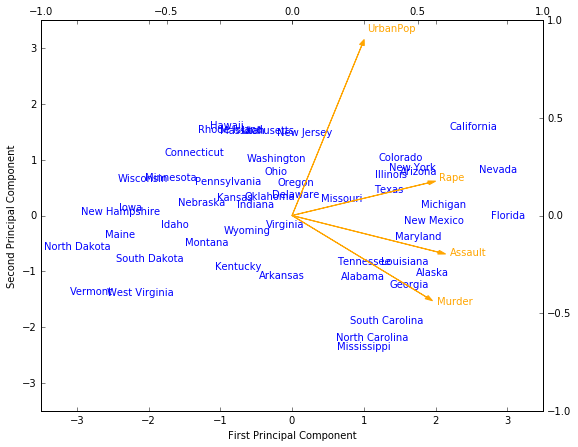

In [21]:
comp1 = loadings[0]
comp2 = loadings[1]
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

arrests_projected_df = pd.DataFrame(arrests_projected, index = arrests_df.index)
pca_loadings_df = pd.DataFrame(loadings.T, index=arrests_df.columns)

for i in arrests_projected_df.index:
    ax1.annotate(i, (arrests_projected_df.ix[i,0], arrests_projected_df.ix[i,1]), ha='center', color='blue', fontsize=10)
    
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
ax2 = ax1.twinx().twiny() 
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y')

a = 1.08  
for i in pca_loadings_df.index:
    ax2.annotate(i, (pca_loadings_df.ix[i,0]*a, pca_loadings_df.ix[i,1]*a), color='orange')

for i in range(0,4):
  ax2.arrow(0, 0, pca_loadings_df.iloc[i,0], pca_loadings_df.iloc[i,1], color='orange')

plt.show()